This notebook focusses on the Translation class of the StochasticProcess module which can be used to translate Gaussian stochastic process to non-Gaussian stochastic process. Firstly, the sample generation code is presented, details of which can be found in 'SRM.ipynb'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [2]:
T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

S = 125 / 4 * w ** 2 * np.exp(-5 * w)

# Sample 1000 realizations of the stochastic process
nsamples = 1000

from UQpy.StochasticProcess import SRM
SRM_object = SRM(nsamples=nsamples, power_spectrum=S, time_duration=[dt], frequency_length=[dw],
                 number_time_intervals=[nt], number_frequency_intervals=[nw], case='uni')
samples = SRM_object.samples

Before transforming the samples from Gaussian distribution to non-Gaussian distribution, we need to define the
non-Gaussian marginal distribution using UQpy.Distributions module

In [3]:
from UQpy.Distributions import Lognormal

dist_object = Lognormal(0.5, 0, np.exp(0.5))

Next, we import the Translation class from the Stochastic Process module of UQpy package. After that, we initialize a
Translation object to translate the gaussian samples generated above to lognormal samples.

In [4]:
from UQpy.StochasticProcess import Translation

Translate_object = Translation(dist_object=dist_object, time_duration=dt, frequency_interval=dw,
                               number_time_intervals=nt, number_frequency_intervals=nw, power_spectrum_gaussian=S,
                               samples_gaussian=samples)
samples_ng = Translate_object.samples_non_gaussian
samples_ng = samples_ng - np.mean(samples_ng)
R_ng = Translate_object.correlation_function_non_gaussian
S_ng = Translate_object.power_spectrum_non_gaussian
r_ng = Translate_object.scaled_correlation_function_non_gaussian

Finally, Various attributes of the Translation class namely the non-Gaussian Power Spectrum and non-Gaussian time histories are plotted

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


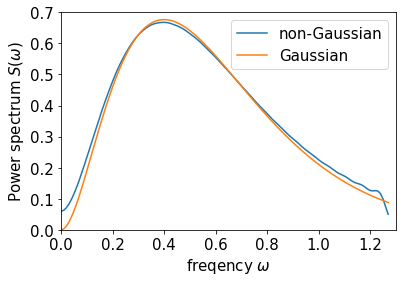

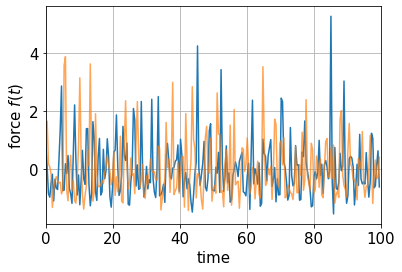

In [9]:
fig7 = plt.figure()
plt.plot(w, S_ng, label='non-Gaussian')
plt.plot(w, S, label='Gaussian')
plt.xlabel('freqency $\omega$')
plt.ylabel('Power spectrum $S(\omega)$')
plt.xlim(0, 1.3)
plt.ylim(0, 0.7)
plt.legend(loc='upper right')
plt.savefig('power_spectrum_compare.eps')
plt.show()

fig8 = plt.figure()
for j in range(2):
    plt.plot(t, samples_ng[j, 0], alpha=1.-j*0.3)
plt.xlim(0, 100)
plt.xlabel('time')
plt.ylabel('force $f(t)$')
plt.grid('on', which='both')
plt.savefig('time_history_lognormal.eps')
plt.show()